## Assignment 02a - Linear Regression, Regularization and Polynomial Regression

Group:

*  Jannik Bucher
*  Dennis Imhof

### Using dataset: SkillCraft1 Master Table Dataset
[SkillCraft1 on UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset#)

#### Note:

Typically "LeagueIndex" is used as the response variable. Since "LeagueIndex" is a categorical (ordinal) variable and we are supposed to perform linear regression, we will predict APM (actions per minute) from the most promising variables. 

### Assignments

Before performing the practical work, you need download the dataset accordingly to the option on your machine (or cloud service)
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set) with train_test_split method of Skikit Learn library

2. Using the scikit-learn library (http://scikit-learn.org/stable/), train the linear regression model for the training sample (example: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
3. Check the accuracy of the model from the test set

4. Build a model using a polynomial function (example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py). Build plots with the dependence of the error on the degree of the polynomial function.

5. Build a model using regularization (example: http://scikit-learn.org/stable/modules/linear_model.html). On the basis of experiments, select parameters for regularization. Build plots with the dependence of the error on the regularization coefficient.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [22]:
df = pd.read_csv("data/SkillCraft1_Dataset.csv")
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [23]:
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [24]:
# No missing values in any of the columns
df.isnull().any()

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
GameID                  3395 non-null int64
LeagueIndex             3395 non-null int64
Age                     3395 non-null object
HoursPerWeek            3395 non-null object
TotalHours              3395 non-null object
APM                     3395 non-null float64
SelectByHotkeys         3395 non-null float64
AssignToHotkeys         3395 non-null float64
UniqueHotkeys           3395 non-null int64
MinimapAttacks          3395 non-null float64
MinimapRightClicks      3395 non-null float64
NumberOfPACs            3395 non-null float64
GapBetweenPACs          3395 non-null float64
ActionLatency           3395 non-null float64
ActionsInPAC            3395 non-null float64
TotalMapExplored        3395 non-null int64
WorkersMade             3395 non-null float64
UniqueUnitsMade         3395 non-null int64
ComplexUnitsMade        3395 non-null float64
ComplexAbilitiesUsed    3395 non

In [26]:
# Though there were no None values in the dataset, closer inspection reveals missing values marked with "?"
# Convert the object-variables to numeric and set the missing values to None
def convert_to_numeric(series):
    series = series.apply(lambda x: None if x == "?" else x)
    series = pd.to_numeric(series)
    return series

columns = ["Age", "HoursPerWeek", "TotalHours"]
for col in columns:
    df[col] = convert_to_numeric(df[col])

df.loc[:, columns].apply(pd.isnull).sum()

Age             55
HoursPerWeek    56
TotalHours      57
dtype: int64

In [27]:
# Let's see if any predictors show a strong correlation with the response variable.
df.iloc[:,1:].corr().loc["APM",:].sort_values()

ActionLatency          -0.722402
GapBetweenPACs         -0.575275
Age                    -0.210559
TotalHours              0.072850
UniqueUnitsMade         0.100844
ComplexAbilitiesUsed    0.131587
ComplexUnitsMade        0.136143
TotalMapExplored        0.220749
HoursPerWeek            0.246844
MinimapAttacks          0.271021
MinimapRightClicks      0.322179
WorkersMade             0.349692
UniqueHotkeys           0.361704
ActionsInPAC            0.383985
AssignToHotkeys         0.578416
NumberOfPACs            0.651237
LeagueIndex             0.662309
SelectByHotkeys         0.840693
APM                     1.000000
Name: APM, dtype: float64

In [28]:
# df_clean = df.dropna()

# Split the data into train and test set
train, test = train_test_split(df, train_size=0.7)

# Select predictors that correlate with the response variable
predictors = ["SelectByHotkeys", "AssignToHotkeys", "NumberOfPACs", "GapBetweenPACs", "ActionLatency", "MinimapRightClicks", "WorkersMade"]

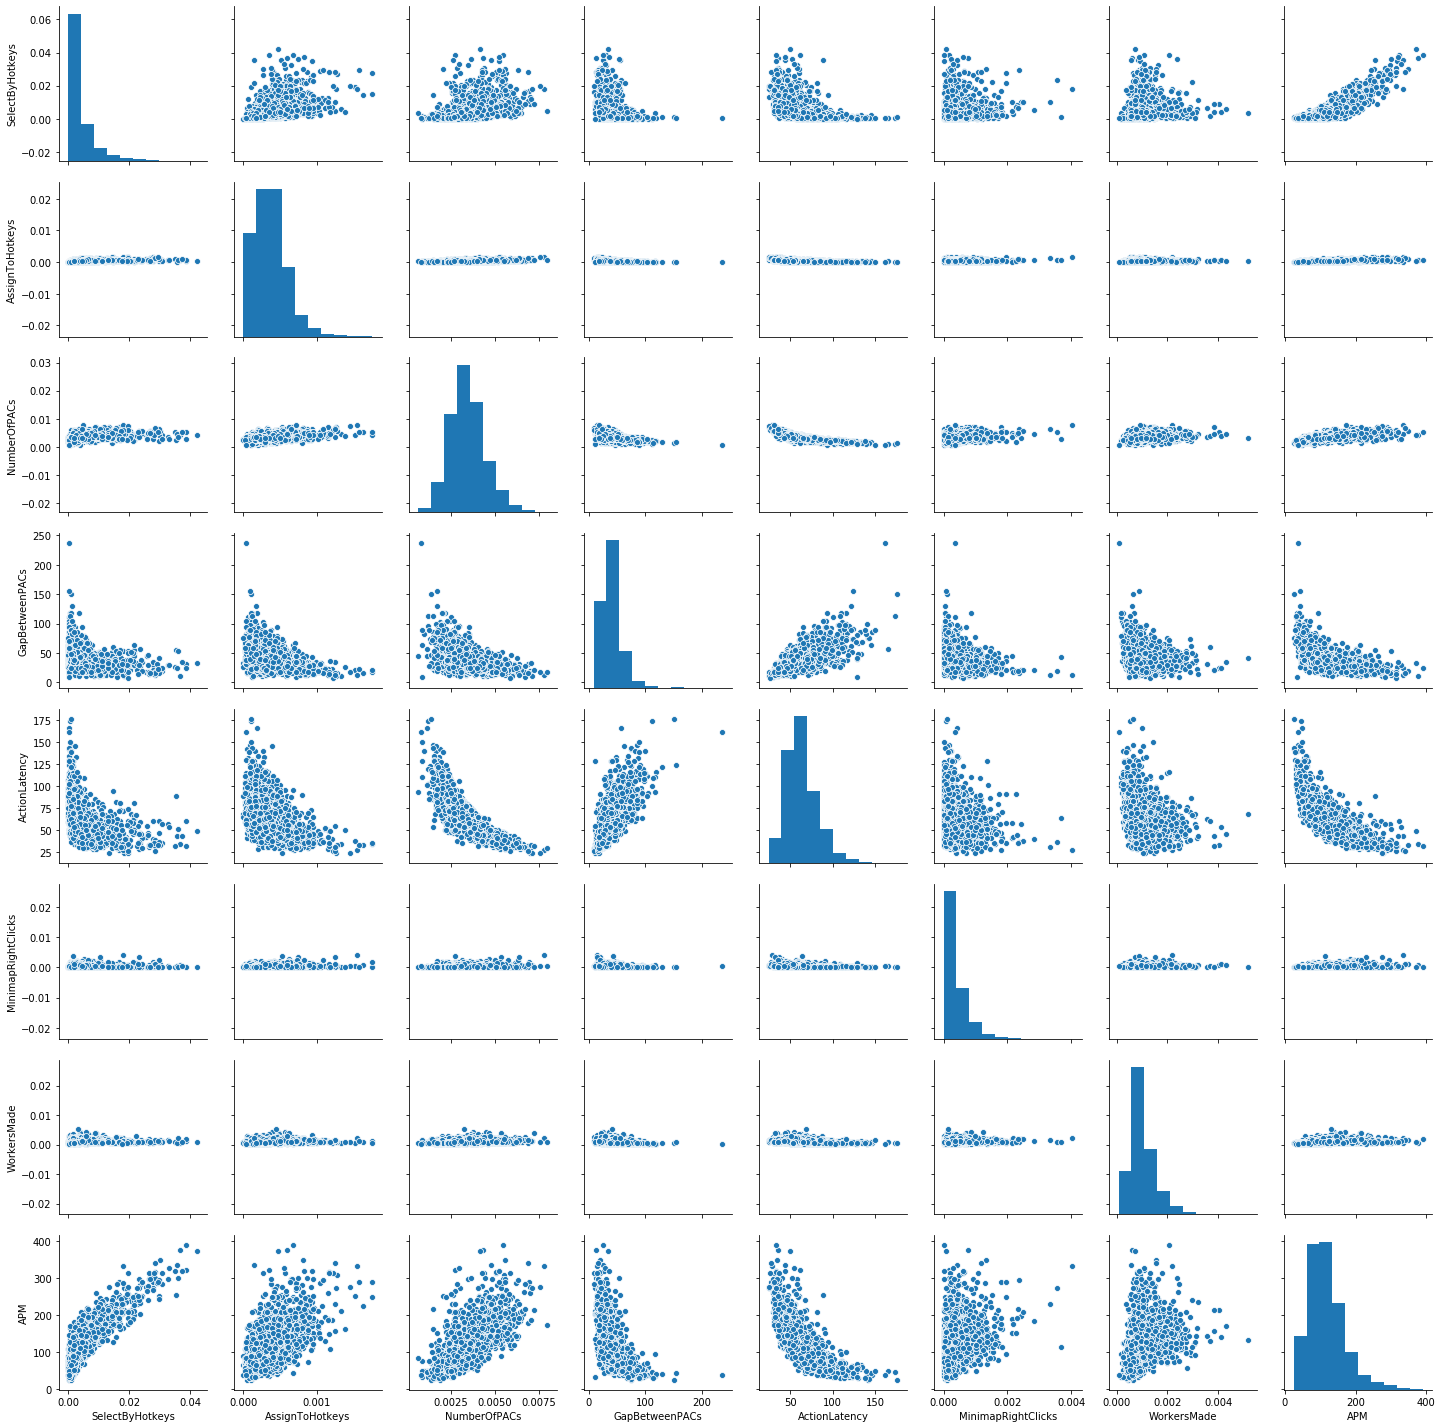

In [29]:
sns.pairplot(train[predictors + ["APM"]])
plt.show()

*  Judging by the pairplot, SelectByHotkeys and NumberOfPACs seem to be linearly correlated with APM.
*  ActionLatency seems to be non-linearly related to APM. This might be a good variable to use for the polynomial regression

In [51]:
errors = {}
coef = {}
intercept = {}

for predictor in predictors:
    fit_lin = LinearRegression().fit(train[[predictor]], train["APM"])
    pred = fit_lin.predict(test[[predictor]])
    errors[predictor] = np.square(test["APM"] - pred).sum() / len(test["APM"])
    coef[predictor] = fit_lin.coef_[0]
    intercept[predictor] = fit_lin.intercept_
    errors = pd.Series(error, name="RMSE").sort_values().round(3)
print("Mean Squared Errors (MSE)")
print(errors)

Mean Squared Errors (MSE)
SelectByHotkeys       0.896
ActionLatency         1.144
NumberOfPACs          1.265
GapBetweenPACs        1.338
AssignToHotkeys       1.342
WorkersMade           1.544
MinimapRightClicks    1.559
Name: RMSE, dtype: float64


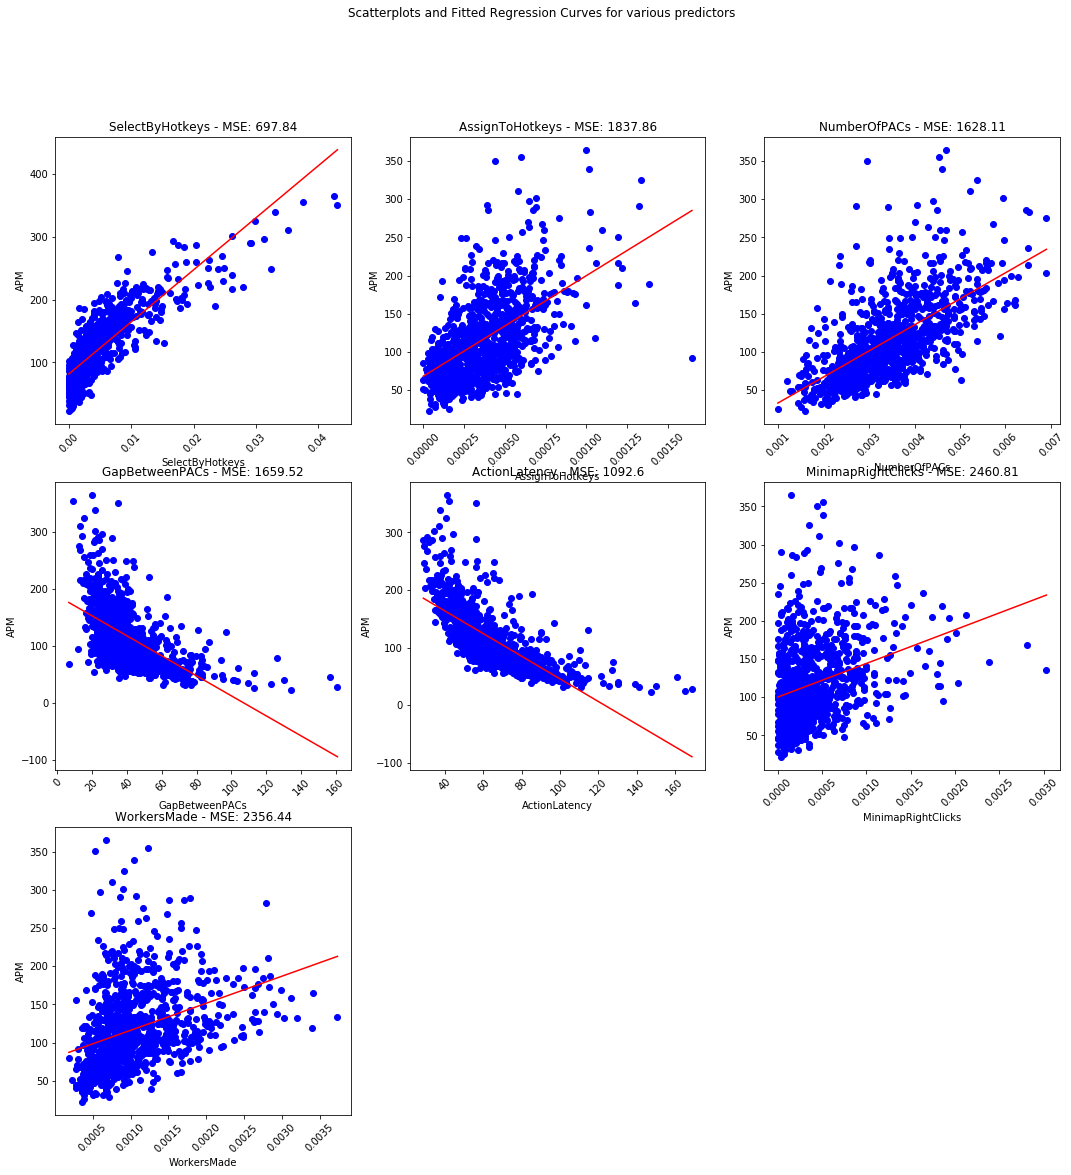

In [49]:
rows = np.ceil(len(predictors) / 3)
fig = plt.figure(figsize=(18,18))
fig.suptitle("Scatterplots and Fitted Regression Curves for various predictors")
for i, predictor in enumerate(predictors):
    ax = fig.add_subplot(rows, 3, i+1)
    ax.set_xlabel(predictor)
    ax.set_ylabel("APM")
    ax.set_title("{} - MSE: {}".format(predictor, errors[predictor]))
    x = np.linspace(min(test[predictor]), max(test[predictor]), 100)
    ax.plot(test[predictor], test["APM"], 'bo')
    ax.plot(x, coef[predictor] * x + intercept[predictor], 'r-')
    ax.tick_params(axis="x", labelrotation=45)

### Polynomial Regression
Here we try fitting polynomial regression curves with predictors GapBetweenPACs and ActionLatency since they seem to be non-linearly related to APM.

In [72]:
def create_polynomial_features(predictor, degree):
    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(train[[predictor]])
    X_test = poly.fit_transform(test[[predictor]])
    return X_train, X_test

coefficients = {}
intercepts = {}
errors = {}

poly_predictors = ["GapBetweenPACs", "ActionLatency", "SelectByHotkeys"]
poly_predictors = predictors
for predictor in poly_predictors:
    X_train, X_test = create_polynomial_features(predictor, 2)    
    fit = LinearRegression().fit(X_train, train["APM"])
    pred = fit.predict(X_test)
    
    coefficients[predictor] = fit.coef_
    intercepts[predictor] = fit.intercept_
    errors[predictor] = -np.mean(cross_val_score(fit, test_X[[predictor]], test_y,
                             scoring="neg_mean_squared_error", cv=10))

errors = pd.Series(errors, name="MSE").sort_values().round(2)
print("Root Mean Squared Errors (MSE)")
print(errors)

Root Mean Squared Errors (MSE)
SelectByHotkeys        739.50
ActionLatency         1031.40
NumberOfPACs          1342.89
GapBetweenPACs        1509.55
AssignToHotkeys       1636.50
WorkersMade           1917.28
MinimapRightClicks    2049.85
Name: MSE, dtype: float64


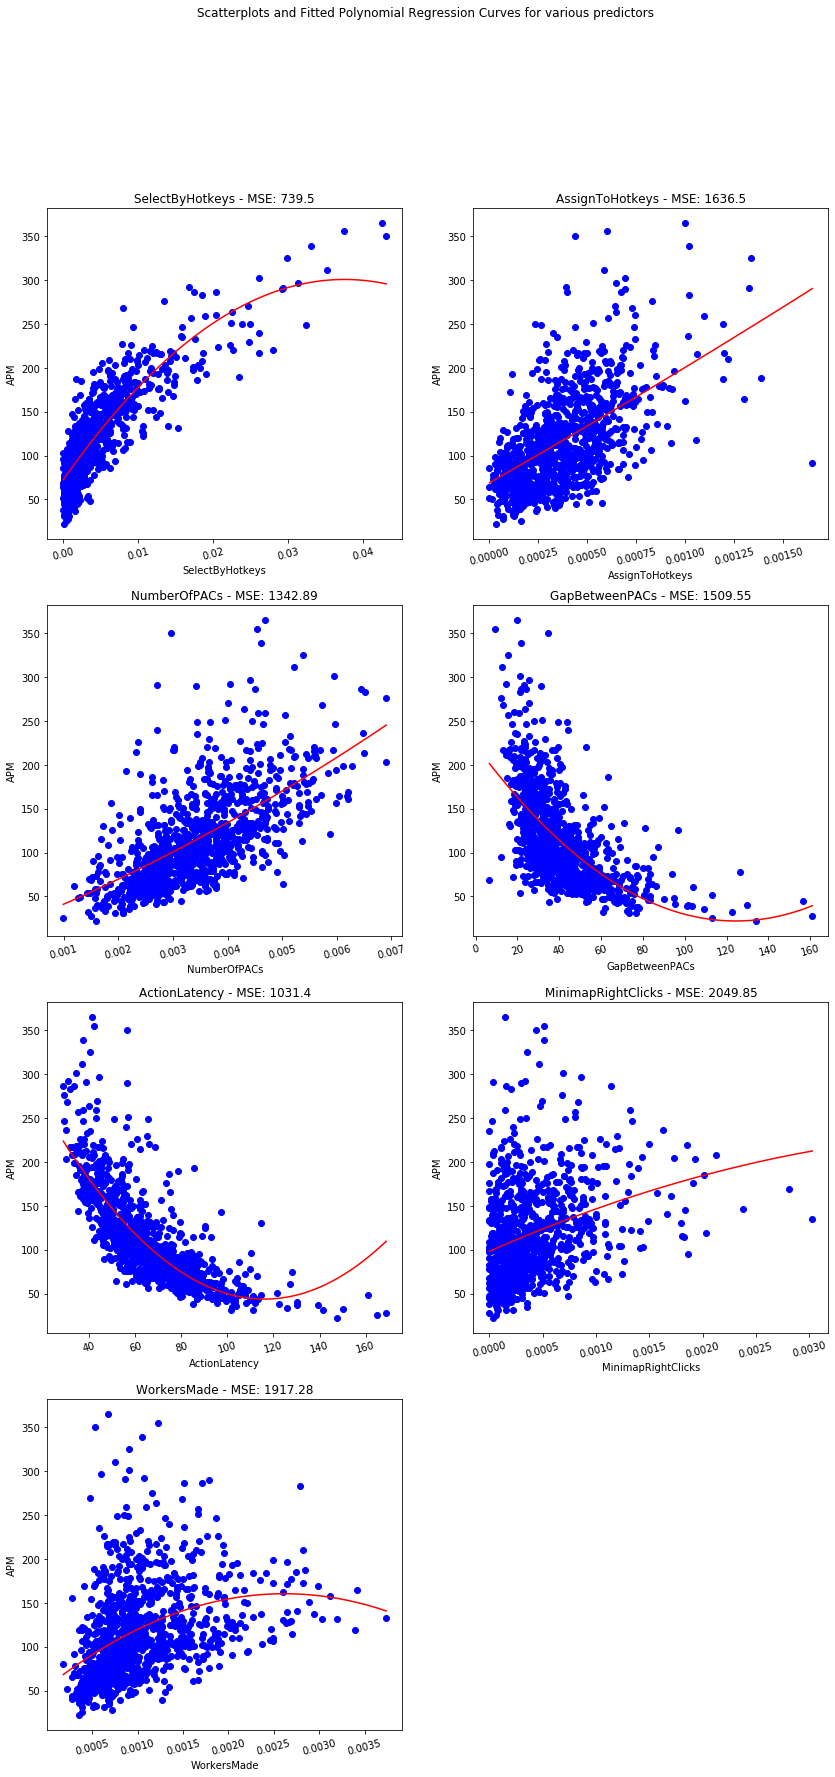

In [73]:
rows = np.ceil(len(poly_predictors) / 2)
fig = plt.figure(figsize=(14,28))
fig.suptitle("Scatterplots and Fitted Polynomial Regression Curves for various predictors")
for i, predictor in enumerate(poly_predictors):
    ax = fig.add_subplot(rows, 2, i+1)
    ax.set_xlabel(predictor)
    ax.set_ylabel("APM")
    ax.set_title("{} - MSE: {}".format(predictor, errors[predictor]))
    x = np.linspace(min(test[predictor]), max(test[predictor]), 100)
    coefs = coefficients[predictor]
    ys = intercepts[predictor] + coefs[1] * x + coefs[2] * x**2
    ax.plot(test[predictor], test["APM"], 'bo')
    ax.plot(x, ys , 'r-')
    ax.tick_params(axis="x", labelrotation=15, )

## Higher order polynomial fits

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

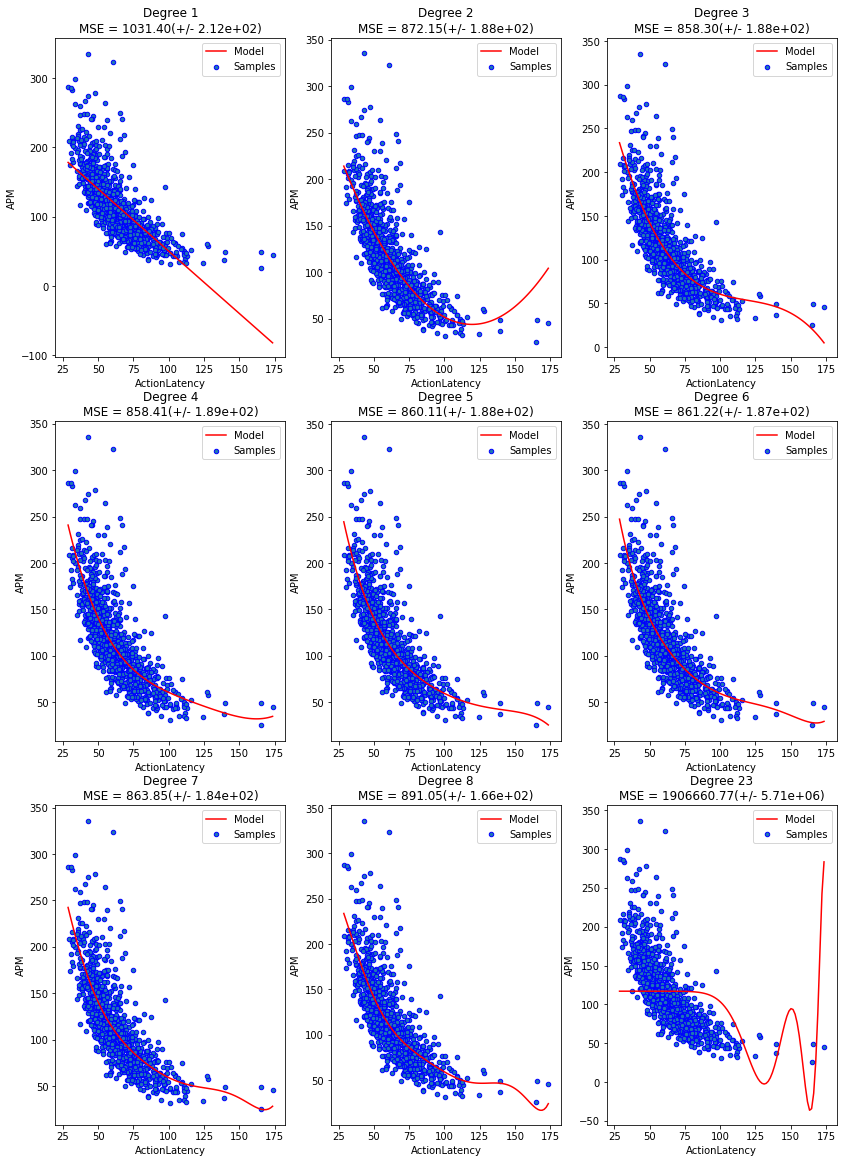

In [75]:
def plot_polynomial_regression(predictor, degrees):
    plt.figure(figsize=(14, 20))
    for i in range(len(degrees)):
        ax = plt.subplot(np.ceil(len(degrees)/3), 3, i + 1)

        polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
        pipeline.fit(train_X[[predictor]], train_y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, test_X[[predictor]], test_y,
                             scoring="neg_mean_squared_error", cv=10)

        xs = np.linspace(np.min(test_X[predictor]), np.max(test_X[predictor]), 100)
        plt.plot(xs, pipeline.predict(xs.reshape(-1,1)), 'r-', label="Model")
        plt.scatter(test_X[[predictor]], test_y, edgecolor='b', s=20, label="Samples")
        ax.set_xlabel(predictor)
        ax.set_ylabel("APM")        
        plt.legend(loc="best")
        plt.title("Degree {}\nMSE = {:.2f}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    plt.show()

train_X, test_X, train_y, test_y = train_test_split(df_train, y, random_state=42, train_size=0.7)   

plot_polynomial_regression("ActionLatency", [1,2,3,4,5,6,7,8,23])

Root Mean Squared Errors (MSE)


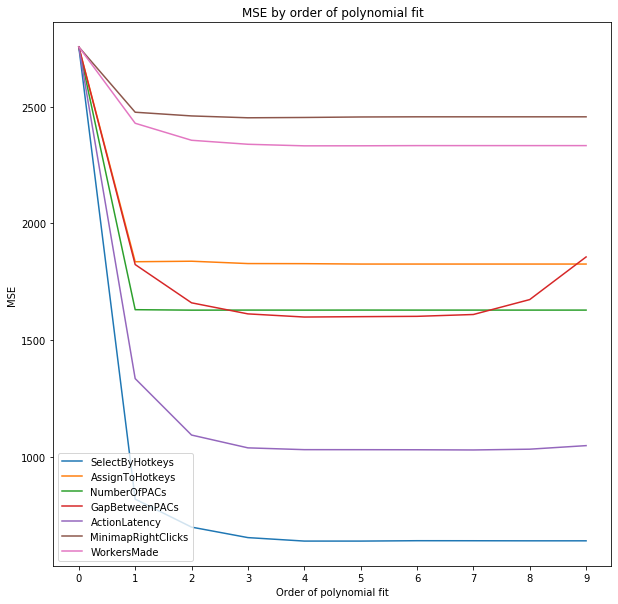

In [55]:
coefficients = {}
intercepts = {}
errors = {}

poly_predictors = ["GapBetweenPACs", "ActionLatency", "SelectByHotkeys"]
poly_predictors = predictors
for predictor in poly_predictors:
    coefficients[predictor] = {}
    intercepts[predictor] = {}
    errors[predictor] = {}
    for i in range(10):
        X_train, X_test = create_polynomial_features(predictor, i)  
        fit = LinearRegression().fit(X_train, train["APM"])
        pred = fit.predict(X_test)
    
        coefficients[predictor][i] = fit.coef_
        intercepts[predictor][i] = fit.intercept_
        errors[predictor][i] = np.square(test["APM"] - pred).sum() / len(test["APM"])

errors = pd.DataFrame(errors)
print("Root Mean Squared Errors (MSE)")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(title="MSE by order of polynomial fit")
plt.plot(errors)
plt.xticks(range(0,10))
ax.set_xlabel("Order of polynomial fit")
ax.set_ylabel("MSE")
plt.legend(labels=errors.columns )

## Regularization

In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

In [57]:
df_train = df.dropna()
y = df_train["APM"]
df_train = df_train.drop(["APM", "GameID", "Age"], axis=1)
train_X, test_X, train_y, test_y = train_test_split(df_train, y, train_size=0.7, random_state=42)

In [62]:
alphas = 10**np.linspace(4,-1, 40)

lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=42)
lasso_cv.fit(train_X, train_y)

cv_score = cross_val_score(lasso_cv, test_X, test_y, cv=10, 
                scoring='neg_mean_squared_error')

cv_score

array([-544.6402269 , -997.57050352, -651.90313763, -771.12718911,
       -929.4923712 , -550.51153339, -758.7726403 , -583.13200984,
       -601.45411473, -860.36392022])

In [63]:
np.sqrt(abs(np.mean(cv_score)))

26.92390693573007

In [64]:
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(train_X, train_y)

cv_ridge_score = cross_val_score(ridge_cv, test_X, test_y, cv=10,
                                scoring="neg_mean_squared_error")

/home/den/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


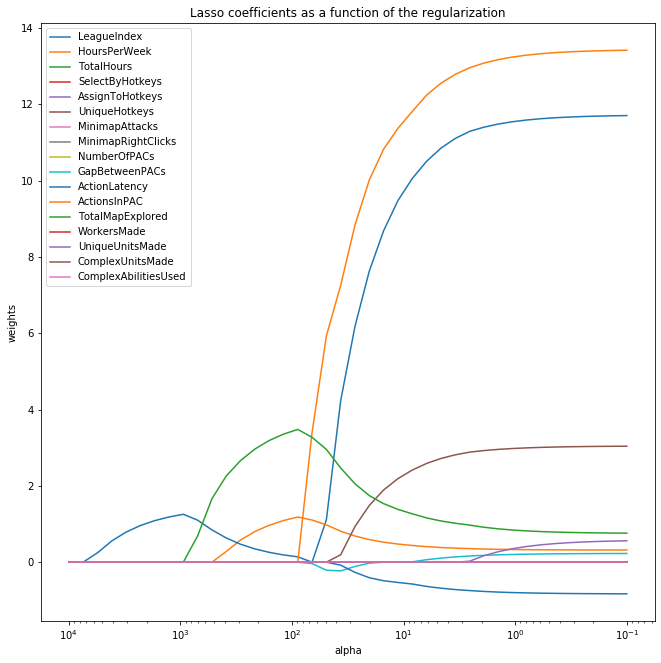

In [107]:

alphas = 10**np.linspace(4,-1, 40)
coefs = []
errors = {}
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(train_X,train_y)
    coefs.append(lasso.coef_)
    errors[np.log10(a)] = -np.mean(cross_val_score(lasso, test_X, test_y, cv=10,
                               scoring="neg_mean_squared_error"))
# #############################################################################
# Display results

plt.figure(figsize=(11,11))

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(labels=train_X.columns)
plt.show()



Text(0, 0.5, 'mean MSE')

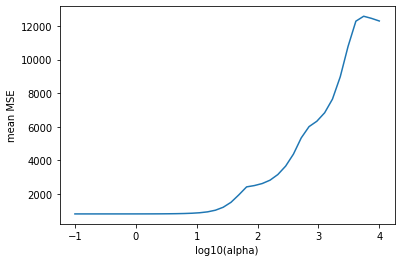

In [108]:
ax = plt.plot(list(errors.keys()), list(errors.values()))
plt.xlabel("log10(alpha)")
plt.ylabel("mean MSE")

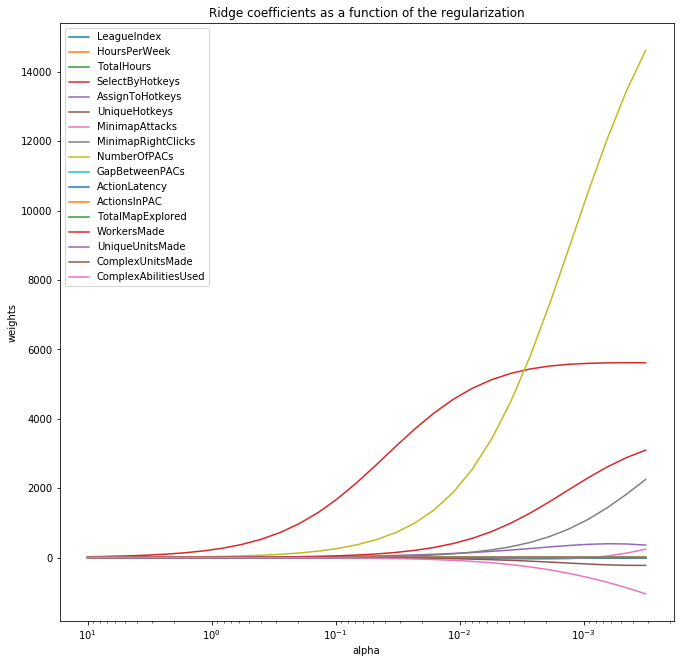

In [109]:
alphas = 10**np.linspace(1,-3.5, 30)
coefs = []
errors = {}
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(train_X,train_y)
    coefs.append(ridge.coef_)
    errors[np.log10(a)] = -np.mean(cross_val_score(ridge, test_X, test_y, cv=10,
                               scoring="neg_mean_squared_error"))

# #############################################################################
# Display results

plt.figure(figsize=(11,11))

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(labels=train_X.columns)
plt.show()


Text(0, 0.5, 'mean MSE')

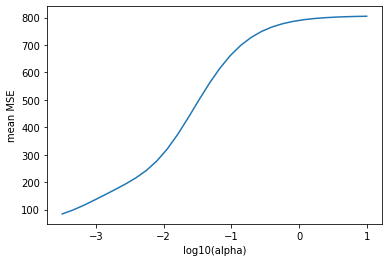

In [110]:
ax = plt.plot(list(errors.keys()), list(errors.values()))
plt.xlabel("log10(alpha)")
plt.ylabel("mean MSE")